In [1]:
import numpy as np
import os
import pandas as pd
import scipy   
import matplotlib.pyplot as plt
from scipy import stats

def format_axis(ax):   
    for pos in ['right', 'top', 'left']:
        ax.spines[pos].set_edgecolor('white')    
    ax.tick_params(axis='x', length=6, width=2, colors='black')
    ax.tick_params(axis='y', length=6, width=2, colors='black') 
    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont) 
  

def getLogBinnedDistribution(x, y, nbins):
    bins   = 10 ** np.linspace(np.log10(min(x)), np.log10(max(x)), nbins)  
    values = [ np.mean([y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]    
    error  = [ np.std( [y[j]  for j in range(len(x)) if x[j] >= bins[i] and x[j] < bins[i+1]])  for i in range(nbins-1)]
    bins   = (bins[1:] + bins[:-1])/2
    return bins, values, error


def getDistribution(keys, normalized = True):   
    uniq_keys = np.unique(keys)
    bins = uniq_keys.searchsorted(keys)
    distr = np.bincount(bins) 
    if normalized == 1: distr = distr/float(np.sum(distr)) 
    return np.asarray(uniq_keys.tolist()), np.asarray(distr.tolist())    
    
    
def getPercentileBinnedDistribution(x, y, nbins):
    x, y = zip(*sorted(zip(x, y), key=lambda tup: tup[0]))
    elements_per_bin = int(len(x)/float(nbins))
    xx  = [np.mean(x[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    yy  = [np.mean(y[i*elements_per_bin:(i+1)*elements_per_bin]) for i in range(nbins)]
    std = [np.std(y[i*elements_per_bin:(i+1)*elements_per_bin])  for i in range(nbins)]
    return xx, yy, std


def getBinnedDistribution(x, y, nbins):
    x = np.asarray(x)
    y = np.asarray(y)
    n, bins   = np.histogram(x, bins=nbins)
    sy, _  = np.histogram(x, bins=nbins, weights=y)
    sy2, _ = np.histogram(x, bins=nbins, weights=y*y)
    mean = sy/n
    std  = np.sqrt(sy2/n - mean*mean) 
    bins = (_[1:] + _[:-1])/2
    return bins, mean, std


def get_cleaned_rankings(toplists):
    ranking_name = {}
    for year in toplists:
        for line in open('Data/djrankings_cleaned/' + year):
            rank, name = line.strip().split('\t')
            if name not in ranking_name:
                ranking_name[name] = [(int(year), int(rank))]
            else:
                ranking_name[name].append((int(year), int(rank)))
        for n, r in ranking_name.items():
            r = sorted_by_second = sorted(r, key=lambda tup: tup[0])
            ranking_name[n] = r   
    return ranking_name
    
    
rankings = get_cleaned_rankings(os.listdir('Data/djrankings_cleaned'))

color_b = '#80b1d3'
color_p = '#bebada'
color_r = '#fb8072'

color_g = '#8dd3c7'
color_y = '#ffffb3'



labelfont  = 20
tickfont   = 16
legendfont = 14


colors_nw      = ['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462','#b3de69'  ]
colors_comms   = { 
    'Sasha & Tiësto community'                           :   '#8dd3c7' ,
    'Carl Cox community'                                 :   '#ffffb3' ,
    'David Guetta community'                             :   '#bebada',
    'Paul van Dyk & John Digweed community'              :   '#fb8072',
    'Armin Van Buuren & Paul Oakenfold community'        :   '#fdb462',
    'Martin Garrix & Dimitri Vegas & Like Mike community':   '#b3de69' , 
    'Hardwell community'                                 :   '#80b1d3'
}

# SFigure1

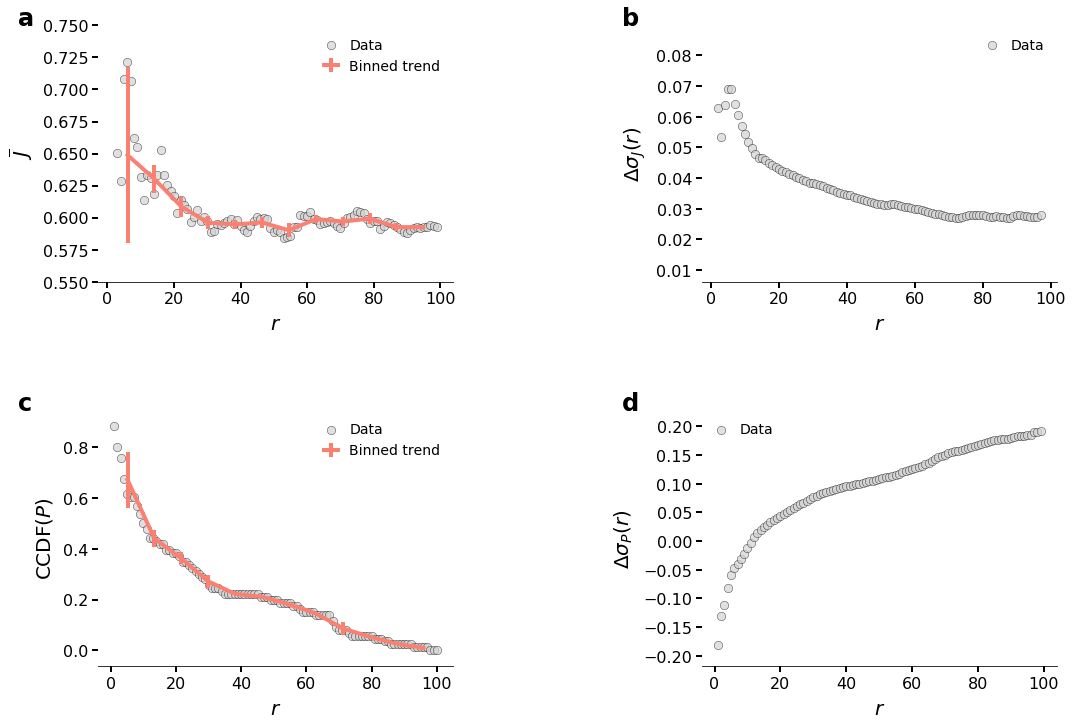

In [34]:
def get_measures(ax, filename, title, tipus):
    x, y = zip(*[(float(line.strip().split('\t')[0]), float(line.strip().split('\t')[1])) for line in open('DataSI/SFig2/'+filename )])
    ax.scatter(x,y, color = 'lightgrey', alpha = 0.7, s = 70, edgecolor = 'k', linewidths = 0.5, label = 'Data')
    nbins = 12
    bx, by, yerr = getBinnedDistribution(x, y, nbins)
    ax.errorbar(bx, by, yerr= yerr, color = color_r, linewidth = 4, label = 'Binned trend')
    format_axis(ax)    
    ax.set_xlabel('$r$', fontsize = labelfont, labelpad = 8)
    ax.set_ylabel(title, fontsize = labelfont, labelpad = 8) 

    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)    
    leg = ax.legend(loc = 'best', fontsize = legendfont, frameon = False, handlelength = 1 )


def get_vars(ax, filename, tipus):
    x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('DataSI/SFig2/'+filename )])     
    ax.scatter(x,y, color = 'lightgrey', alpha = 0.7, s = 70, edgecolor = 'k', linewidths = 0.5, label = 'Data')
    ax.set_xlabel('$r$', fontsize = labelfont, labelpad = 8)   
    if tipus == 'J':    ax.set_ylabel('$\Delta\sigma_J(r)$', fontsize = labelfont, labelpad = 8)   
    else :    ax.set_ylabel('$\Delta\sigma_P(r)$', fontsize = labelfont, labelpad = 8)   

    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont) 
    format_axis(ax)
    leg = ax.legend(loc = 'best', fontsize = legendfont, frameon = False, handlelength = 1 )




f, ax = plt.subplots(2,2,figsize=(15,10))

get_measures(ax[0,0], 'SFig2_jaccard.dat', 'Jaccard similarity',   'jaccard')
get_measures(ax[1,0], 'SFig2_prob.dat', 'Remaining probability', 'prob')

get_vars(ax[0,1], 'SFig2_var_jacc.dat', 'J')
get_vars(ax[1,1], 'SFig2_var_prob.dat', 'P')

ax[0,0].set_ylabel('$\overline{J}$', fontsize =labelfont)
ax[1,0].set_ylabel('CCDF($P$)', fontsize= labelfont)
ax[0,0].set_ylim([0.55, 0.75])

ax[0,0].annotate('a', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,1].annotate('b', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,0].annotate('c', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,1].annotate('d', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")

ax[0,0].set_ylim([0.55, 0.75])

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=0.5)
plt.savefig('FiguresSI/SFigure1.pdf',bbox_inches="tight") 

# SFigure 2

In [4]:
def get_corr(tipus, num):
    return [float(line.strip())for line in open('DataSI/SFig1/SFig1_'+tipus+'_' + 'lastfm_crawl_' + str(num) + '.dat')]
                                       
rank_overall0 = get_corr('rank_overall', 0)     
rank_overall1 = get_corr('rank_overall', 1)     
rank_overall2 = get_corr('rank_overall', 2)     
rank_overall3 = get_corr('rank_overall', 3)     
rank_overall4 = get_corr('rank_overall', 4)     
rank_overall5 = get_corr('rank_overall', 5)     
rank_overall6 = get_corr('rank_overall', 6)     

rank_lastyear0 = get_corr('rank_lastyear', 0)     
rank_lastyear1 = get_corr('rank_lastyear', 1)     
rank_lastyear2 = get_corr('rank_lastyear', 2)     
rank_lastyear3 = get_corr('rank_lastyear', 3)     
rank_lastyear4 = get_corr('rank_lastyear', 4) 
rank_lastyear5 = get_corr('rank_lastyear', 5) 
rank_lastyear6 = get_corr('rank_lastyear', 6) 


sum_overall0 = get_corr('sum_overall', 0)     
sum_overall1 = get_corr('sum_overall', 1)     
sum_overall2 = get_corr('sum_overall', 2)     
sum_overall3 = get_corr('sum_overall', 3)     
sum_overall4 = get_corr('sum_overall', 4)
sum_overall5 = get_corr('sum_overall', 5)
sum_overall6 = get_corr('sum_overall', 6)


sum_lastyear0 = get_corr('sum_lastyear', 0)     
sum_lastyear1 = get_corr('sum_lastyear', 1)     
sum_lastyear2 = get_corr('sum_lastyear', 2)     
sum_lastyear3 = get_corr('sum_lastyear', 3)     
sum_lastyear4 = get_corr('sum_lastyear', 4) 
sum_lastyear5 = get_corr('sum_lastyear', 5) 
sum_lastyear6 = get_corr('sum_lastyear', 6) 


corr_last0 = stats.spearmanr(sum_lastyear0, rank_lastyear0)[0]
corr_last1 = stats.spearmanr(sum_lastyear1, rank_lastyear1)[0]
corr_last2 = stats.spearmanr(sum_lastyear2, rank_lastyear2)[0]
corr_last3 = stats.spearmanr(sum_lastyear3, rank_lastyear3)[0] 
corr_last4 = stats.spearmanr(sum_lastyear4, rank_lastyear4)[0] 
corr_last5 = stats.spearmanr(sum_lastyear5, rank_lastyear5)[0] 
corr_last6 = stats.spearmanr(sum_lastyear6, rank_lastyear6)[0] 


corr_all0 = stats.spearmanr(sum_overall0, rank_overall0)[0]
corr_all1 = stats.spearmanr(sum_overall1, rank_overall1)[0]
corr_all2 = stats.spearmanr(sum_overall2, rank_overall2)[0]
corr_all3 = stats.spearmanr(sum_overall3, rank_overall3)[0] 
corr_all4 = stats.spearmanr(sum_overall4, rank_overall4)[0] 
corr_all5 = stats.spearmanr(sum_overall5, rank_overall5)[0] 
corr_all6 = stats.spearmanr(sum_overall6, rank_overall6)[0] 


print(-1*np.mean([corr_last0, corr_last1, corr_last2, corr_last3, corr_last4]))
print(-1*np.mean([corr_all0,  corr_all1,  corr_all2,  corr_all3,  corr_all4 ]))

0.37072206742412683
0.3103272495305649


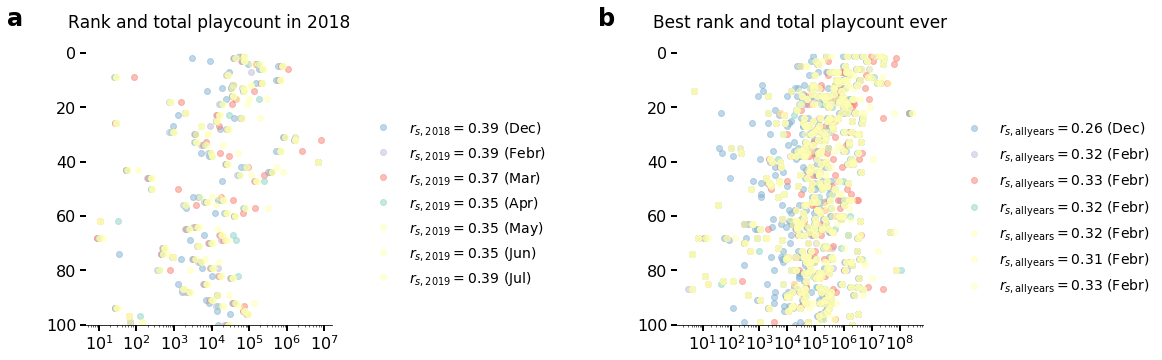

In [6]:
f, ax = plt.subplots(1,2,figsize=(15,5))

ax[0].set_title('Rank and total playcount in 2018', fontsize = 17, pad = 25)
ax[1].set_title('Best rank and total playcount ever', fontsize = 17, pad = 25)

ax[0].plot(sum_lastyear0, rank_lastyear0, 'o', color = color_b,  alpha = 0.5, label = '$r_{s, 2018} = $' + str(-1*round(corr_last0, 2)) + ' (Dec)')
ax[1].plot(sum_overall0,  rank_overall0, 'o', color = color_b,   alpha = 0.5,  label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all0, 2))  + ' (Dec)')

ax[0].plot(sum_lastyear1, rank_lastyear1, 'o', color = color_p, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last1, 2))  + ' (Febr)')
ax[1].plot(sum_overall1,  rank_overall1, 'o',  color = color_p, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all1,  2))  + ' (Febr)')

ax[0].plot(sum_lastyear2, rank_lastyear2, 'o', color = color_r, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last2, 2))  + ' (Mar)')
ax[1].plot(sum_overall2,  rank_overall2, 'o',  color = color_r, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all2, 2))   + ' (Febr)')

ax[0].plot(sum_lastyear3, rank_lastyear3, 'o', color = color_g, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last3, 2))  + ' (Apr)')
ax[1].plot(sum_overall3,  rank_overall3, 'o',  color = color_g, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all3, 2))   + ' (Febr)')

ax[0].plot(sum_lastyear4, rank_lastyear4, 'o', color = color_y, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last4, 2))  + ' (May)')
ax[1].plot(sum_overall4,  rank_overall4, 'o',  color = color_y, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all4, 2))   + ' (Febr)')

ax[0].plot(sum_lastyear5, rank_lastyear5, 'o', color = color_y, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last5, 2))  + ' (Jun)')
ax[1].plot(sum_overall5,  rank_overall5, 'o',  color = color_y, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all5, 2))   + ' (Febr)')

ax[0].plot(sum_lastyear6, rank_lastyear6, 'o', color = color_y, alpha = 0.5, label = '$r_{s, 2019} = $' + str(-1*round(corr_last6, 2))  + ' (Jul)')
ax[1].plot(sum_overall6,  rank_overall6, 'o',  color = color_y, alpha = 0.5, label = '$r_{s, {\\rm all years}} = $' + str(-1*round(corr_all6, 2))   + ' (Febr)')

ax[0].annotate('a', xy=(-0.32, 1.1), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1].annotate('b', xy=(-0.32, 1.1), xycoords="axes fraction", fontsize = 24,    weight="bold")

for aax in ax:
    format_axis(aax)
    aax.set_ylim([100,0])
    aax.set_xscale('log')
     
for i in range(2):    
    ax[i].legend(bbox_to_anchor=(1.1, 0.8), fontsize = legendfont, frameon = False)
    for tick in ax[i].xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
    for tick in ax[i].yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)   
    

plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1.4, hspace=None)
plt.savefig('FiguresSI/SFigure2.pdf',bbox_inches="tight") 

# SFigure3

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


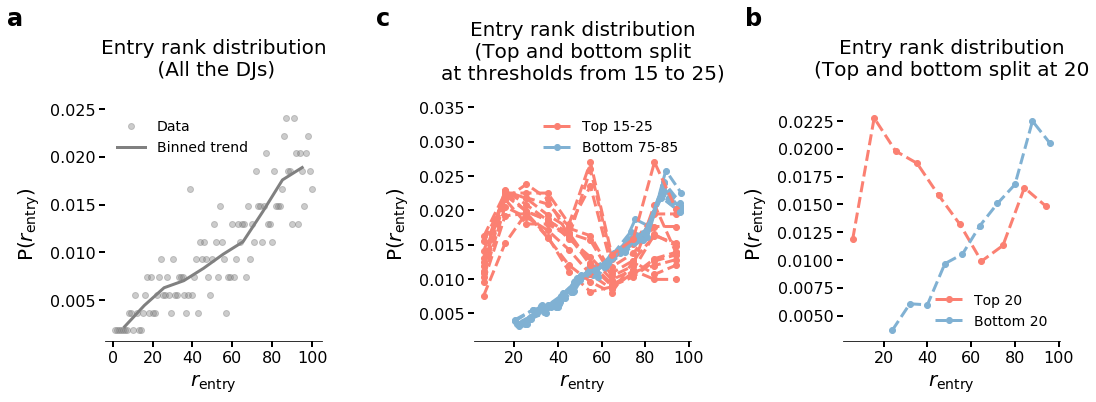

In [6]:
def get_entry_distr(entries, ax, color, split, dots = True, labell = ''):
    
    nbins = 10
    x, y = getDistribution(entries)
    bx, by, byerr = getBinnedDistribution(x,y,nbins)
    if dots: 
        ax.plot(x,y, 'o', color = color, alpha = 0.4, label= 'Data')
        ax.legend(loc = 'best', frameon = False, fontsize = legendfont)        
    if 'steel' in color:     
        ax.plot(bx,by,'o--',linewidth=3, color = color_b,label = labell)#'bottom ' + str(100-split))
        ax.legend(loc = 'best', frameon = False, fontsize = legendfont)
    elif 'crimson' in color:
        ax.plot(bx,by,'o--',linewidth=3, color = color_r,label = labell)#'top ' + str(split))
        ax.legend(loc = 'best', frameon = False, fontsize = legendfont)
    else:
        if 'grey' == color:
            ax.plot(bx,by, linewidth=3, color = color, label = 'Binned trend')
        ax.legend(loc = 'best', frameon = False, fontsize = legendfont)

    for tick in ax.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)          
    for tick in ax.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)
        
        
def split_entry_dist(split):  
    
    allentry    = []
    bestentry   = []
    bottomentry = []
    
    for dj, ranks in rankings.items():

        entryrank = ranks[0][1]
        bestrank  = min(list(zip(*ranks))[1])

        allentry.append(entryrank)
        if bestrank < split:
            bestentry.append(entryrank)
        else:
            bottomentry.append(entryrank)

    return allentry, bestentry, bottomentry
    
    
    
    
f, ax = plt.subplots(1,3,figsize = (15,5.5))
split = 30

allentry, bestentry, bottomentry = split_entry_dist(split)
get_entry_distr(allentry,    ax[0], 'grey', split)
ax[0].set_title('Entry rank distribution\n (All the DJs)', fontsize = 20, pad = 32)
ax[1].set_title('Entry rank distribution\n (Top and bottom split \nat thresholds from 15 to 25)', fontsize = 20, pad = 28)
get_entry_distr(bestentry,   ax[1], 'crimson',   split, False)
get_entry_distr(bottomentry, ax[1], 'steelblue', split, False)

for split in range(16,25):
    allentry, bestentry, bottomentry = split_entry_dist(split)
    get_entry_distr(bestentry,   ax[1], 'crimson',   split, False)
    get_entry_distr(bottomentry, ax[1], 'steelblue', split, False)
                
ax[1].get_legend().remove()
 
split = 15 
allentry, bestentry, bottomentry = split_entry_dist(split)               
get_entry_distr(bestentry,   ax[1], 'crimson',   split, False, labell = 'Top 15-25')
get_entry_distr(bottomentry, ax[1], 'steelblue', split, False, labell = 'Bottom 75-85')               

split = 20 
allentry, bestentry, bottomentry = split_entry_dist(split)
ax[2].set_title('Entry rank distribution\n(Top and bottom split at ' + str(split), fontsize = 20, pad = 32)

get_entry_distr(bestentry,   ax[2], 'crimson',   split, False, labell = 'Top 20')
get_entry_distr(bottomentry, ax[2], 'steelblue', split, False, labell = 'Bottom 20')

ax[0].annotate('a', xy=(-0.45, 1.350), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1].annotate('c', xy=(-0.45, 1.350), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[2].annotate('b', xy=(-0.45, 1.35), xycoords="axes fraction", fontsize = 24,    weight="bold")

ax[0].set_xlabel('$r_{\\rm entry}$', fontsize = labelfont, labelpad = 8)
ax[1].set_xlabel('$r_{\\rm entry}$', fontsize = labelfont, labelpad = 8)
ax[2].set_xlabel('$r_{\\rm entry}$', fontsize = labelfont, labelpad = 8)

ax[0].set_ylabel('P($r_{\\rm entry}$)', fontsize = labelfont, labelpad = 8)
ax[1].set_ylabel('P($r_{\\rm entry}$)', fontsize = labelfont, labelpad = 8)
ax[2].set_ylabel('P($r_{\\rm entry}$)', fontsize = labelfont, labelpad = 8)

ax[1].set_ylim([0.001,0.035])


for aax in ax:
    format_axis(aax)
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.7, hspace=1)
plt.savefig('FiguresSI/SFigure3.pdf',bbox_inches="tight") 

# SFigure4-5

Best rank Degree -0.2632152825142255 3
Best rank Betweenness -0.23357632487139596 3
Best rank PageRank -0.2614768076843726 3
Best rank Clustering coefficient -0.10853031495771857 3


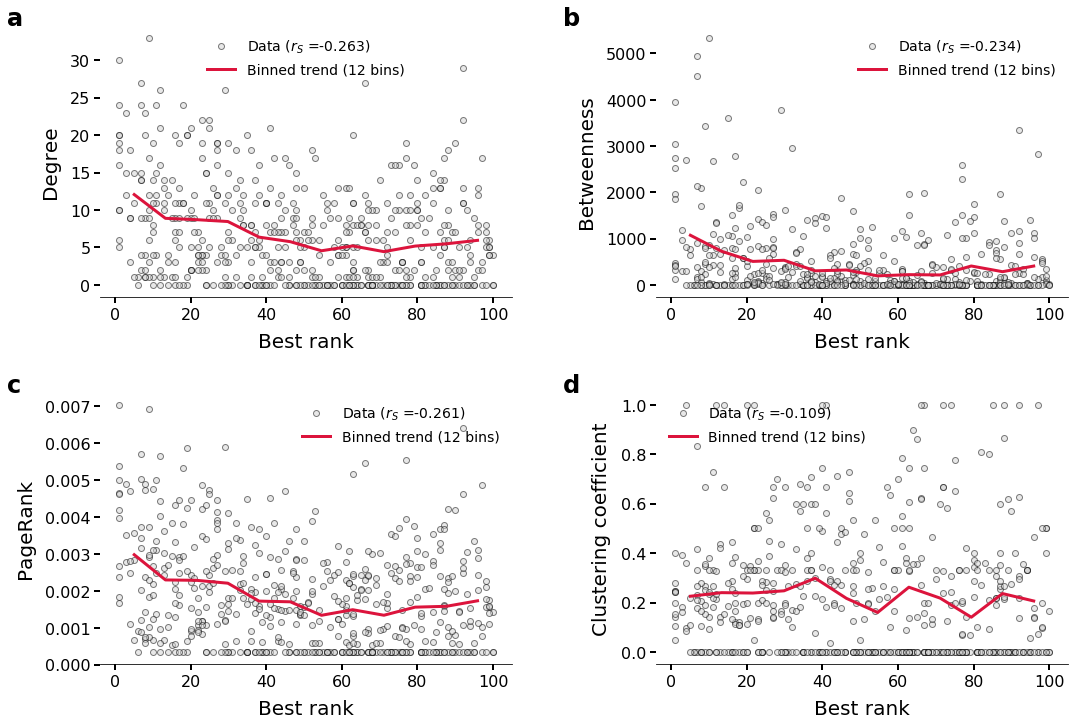

In [7]:
ranks = pd.read_csv('DataSI/SFig4/SFig4_ranks_centralities.csv')

f, ax = plt.subplots(2,2,figsize=(15,10))    
indicies = [(i,j) for i in range(2) for j in range(2)]  
    
succ = ranks.best
sname = 'Best rank'
 

for ind, (meas, name) in enumerate([('degree', 'Degree'), ('between', 'Betweenness'), ('pagerank', 'PageRank'), ('cluster', 'Clustering coefficient')]):
    x = succ
    y = ranks[meas]
    print(sname, name,stats.spearmanr(x, y)[0],3)
    C = str(round(stats.spearmanr(x, y)[0],3))
    ax[indicies[ind]].plot(x,y, 'o', alpha = 0.5, color = 'lightgrey', markeredgewidth = 1, markeredgecolor = 'k', label = 'Data ($r_S$ =' + C + ')')
    ax[indicies[ind]].set_xlabel(sname, fontsize = labelfont, labelpad = 10)
    ax[indicies[ind]].set_ylabel(name, fontsize = labelfont, labelpad = 10)
    bx, by, _ = getBinnedDistribution(x, y, 12)
    ax[indicies[ind]].plot(bx, by, linewidth= 3, color = 'crimson', label = 'Binned trend (12 bins)')
    ax[indicies[ind]].legend(loc = 'best', fontsize = legendfont, frameon=False)
    format_axis(ax[indicies[ind]])
    
    
ax[0,0].annotate('a', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,1].annotate('b', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,0].annotate('c', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,1].annotate('d', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")    
    
    
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)
plt.savefig('FiguresSI/SFigure4.pdf', bbox_inches="tight")

Average rank Degree -0.20698572815015884 3
Average rank Betweenness -0.17176996445672532 3
Average rank PageRank -0.20185143493969332 3
Average rank Clustering coefficient -0.09020966683175373 3


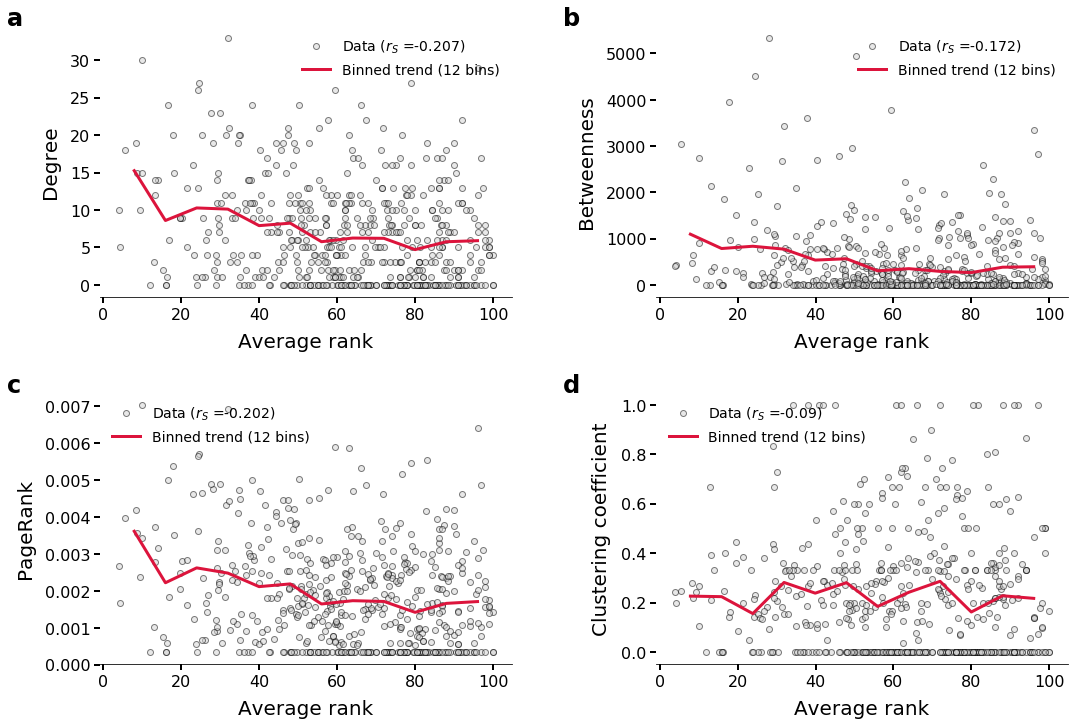

In [8]:
#for succ, sname in [(ranks.best, 'Best rank'), (ranks.avg, 'Average rank')]:
    
f, ax = plt.subplots(2,2,figsize=(15,10))    
indicies = [(i,j) for i in range(2) for j in range(2)]  
    
succ = ranks.avg
sname = 'Average rank'
 

for ind, (meas, name) in enumerate([('degree', 'Degree'), ('between', 'Betweenness'), ('pagerank', 'PageRank'), ('cluster', 'Clustering coefficient')]):
    x = succ
    y = ranks[meas]
    print(sname, name,stats.spearmanr(x, y)[0],3)
    C = str(round(stats.spearmanr(x, y)[0],3))
    ax[indicies[ind]].plot(x,y, 'o', alpha = 0.5, color = 'lightgrey', markeredgewidth = 1, markeredgecolor = 'k', label = 'Data ($r_S$ =' + C + ')')
    ax[indicies[ind]].set_xlabel(sname, fontsize = labelfont, labelpad = 10)
    ax[indicies[ind]].set_ylabel(name, fontsize = labelfont, labelpad = 10)
    bx, by, _ = getBinnedDistribution(x, y, 12)
    ax[indicies[ind]].plot(bx, by, linewidth= 3, color = 'crimson', label = 'Binned trend (12 bins)')
    ax[indicies[ind]].legend(loc = 'best', fontsize = legendfont, frameon=False)
    format_axis(ax[indicies[ind]])
    
    
ax[0,0].annotate('a', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,1].annotate('b', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,0].annotate('c', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,1].annotate('d', xy=(-0.225, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")    
    
plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.35, hspace=0.35)
plt.savefig('FiguresSI/SFigure5.pdf', bbox_inches="tight")

# SFigure6

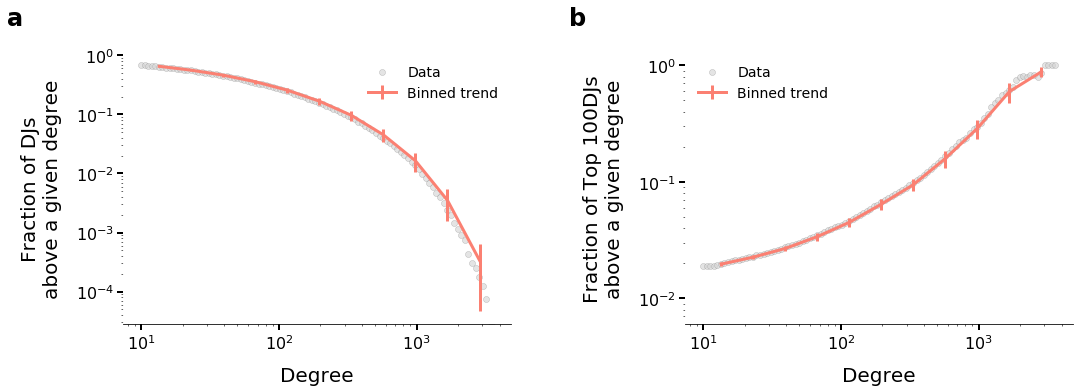

In [10]:
def get_plot_assort(ax, filename):
    x, y = zip(*[(float(line.strip().split('\t')[0]), float(line.strip().split('\t')[1])) for line in open('DataSI/SFig4/'+filename )])
    ax.scatter(x, y, marker='o', edgecolor='grey', linewidth=0.4, color = 'lightgrey', alpha = 0.6, label = 'Data')#, markersize = 6, alpha = 0.15)
    bx, by, byerr = getLogBinnedDistribution(x, y, 12)
    ax.errorbar(bx, by, yerr = byerr, color = color_r, linewidth = 3, label = 'Binned trend')
    ax.set_xscale('log')
    ax.set_yscale('log')
    format_axis(ax)
    ax.legend( frameon = False, fontsize = legendfont)
    
def get_plot_assort2(ax, filename):
    x, y = zip(*[(float(line.strip().split('\t')[0]), float(line.strip().split('\t')[1])) for line in open('DataSI/SFig4/'+filename )])
    ax.plot(x, y, 'o--', linewidth=3.0, color = color_b, alpha = 1, label = 'Data')#, markersize = 6, alpha = 0.15)
    ax.set_xscale('log')
    ax.set_yscale('linear')
    format_axis(ax)    
    ax.legend( frameon = False, fontsize = legendfont)
    
    
f, ax = plt.subplots(1,2,figsize=(15,5))

get_plot_assort(ax[0], 'SFig4_degree_all.dat')
get_plot_assort(ax[1], 'SFig4_degree_Top100_2.dat')

ax[1].set_xlabel('Degree', fontsize = labelfont, labelpad = 14)
ax[0].annotate('a',  xy=(-0.3, 1.10), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1].annotate('b',  xy=(-0.3, 1.10), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0].set_xlabel('Degree', fontsize = labelfont, labelpad = 14)
ax[0].set_ylabel('Fraction of DJs\nabove a given degree', fontsize = labelfont, labelpad = 14)
ax[1].set_ylabel('Fraction of Top 100DJs\nabove a given degree', fontsize = labelfont, labelpad = 14)

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.45, hspace=0.4)
plt.savefig('FiguresSI/SFigure6.pdf',bbox_inches="tight") 

# FigureS7

In [9]:
def community_plots():
    sizes = {}
    files = [f for f in os.listdir('Data') if 'Figure2_cumminitysize_' in f] 
    for ind, fn in enumerate(files):
        title = fn.split('_')[2]
        x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/' + fn)])
        mean = 35*ind
        sizes[title] = (x, y)
    return sizes


def popularity_plots():
    files = [f for f in os.listdir('Data') if 'commpopularit' in f]
    pops  = {}
    for ind, fn in enumerate(files):
        title = fn.split('_')[2]
        x, y = zip(*[  [float(fff) for fff in line.strip().split('\t')] for line in open('Data/' + fn)])
        mean = 35*ind
        pops[title] = (x,y)
    return pops
    
    
pops = popularity_plots()
sizes = community_plots()


corrs = []
corrss = {}
for mod, pop in pops.items():
    x1 = pop[1]
    x2 = sizes[mod][1]
    print(mod + '\t' + str(-1*round(stats.spearmanr(x1,x2)[0],2)))
    corrs.append( stats.spearmanr(x1,x2)[0])
    corrss[mod] = str(-1*round(stats.spearmanr(x1,x2)[0],2))
    
print('\n', np.mean(corrs))

Hardwell community	0.58
Martin Garrix & Dimitri Vegas & Like Mike community	0.96
Sasha & Tiësto community	0.75
Armin Van Buuren & Paul Oakenfold community	0.82
David Guetta community	0.88
Carl Cox community	0.91
Paul van Dyk & John Digweed community	0.22

 -0.7321566057080408


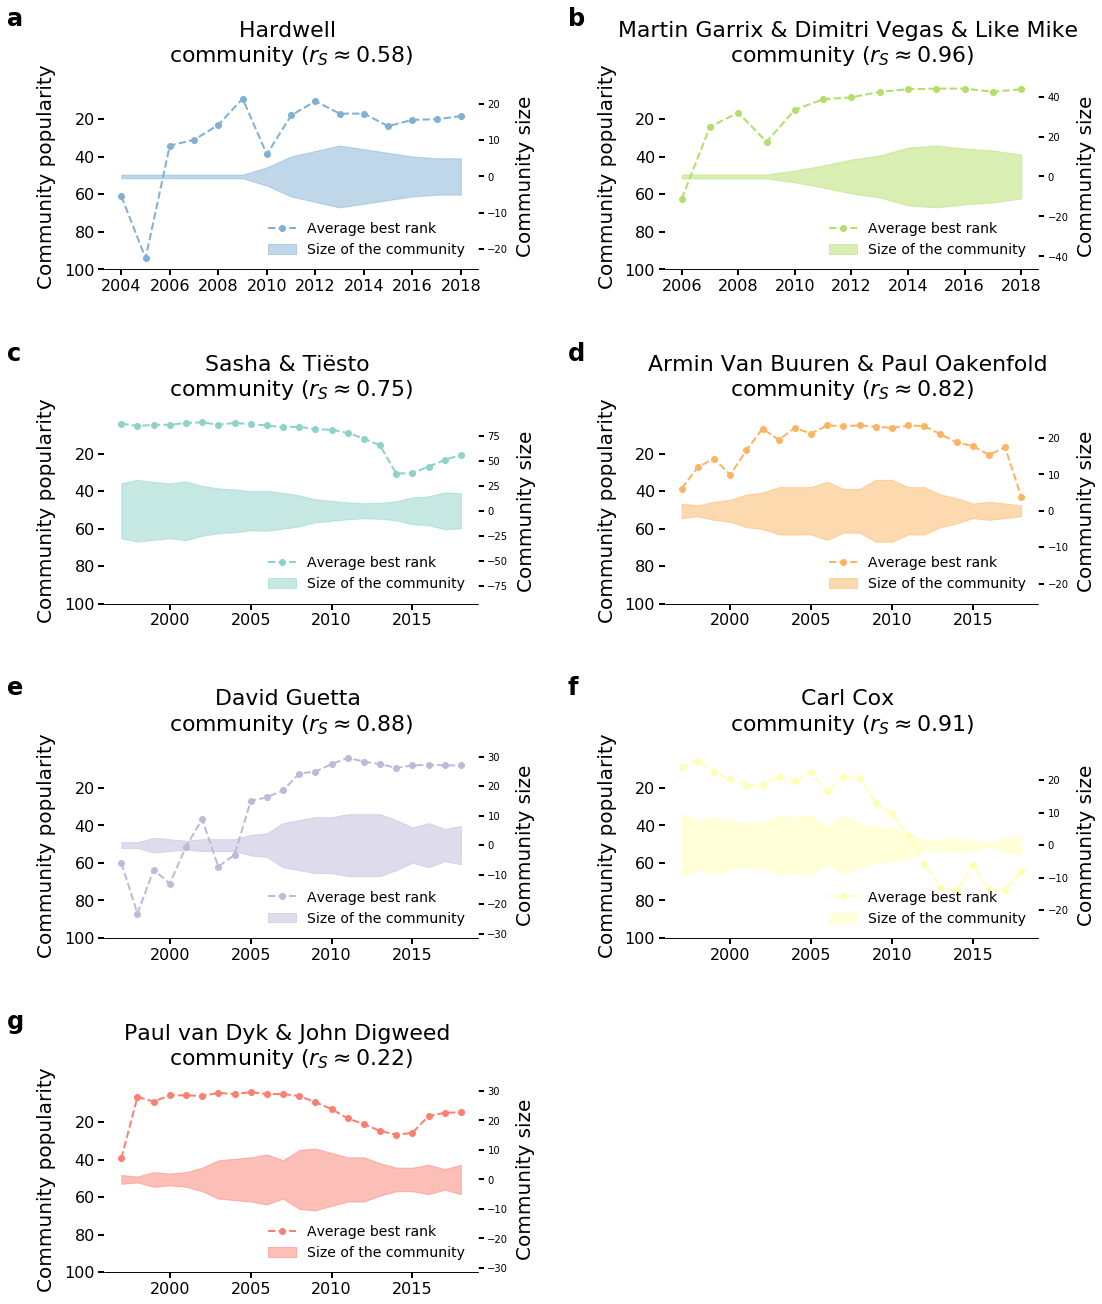

In [16]:
f, ax = plt.subplots(4, 2, figsize = (15,18))
indicies = [(i, j) for i in range(4) for j in range(2)]

for ind, (mod, pop) in enumerate(pops.items()):
    
    if ind >-1:
        aax = ax[indicies[ind]]
        aax.plot(pop[0], pop[1], 'o--', color = colors_comms[mod], linewidth = 2, label = 'Average best rank')
        
        bx = aax.twinx()
        mean = 0
        x = sizes[mod][0]
        y = sizes[mod][1]
        bx.fill_between(x, mean + np.asarray(y)/2, mean +  -1*np.asarray(y)/2, alpha = 0.5, color = colors_comms[mod], label = 'Size of the community')
        aax.set_title(mod.replace('comm', '\ncomm') + ' ($r_{S} \\approx$' + corrss[mod] + ')', fontsize = labelfont+2, pad = 20)
        aax.set_ylim([100,1])
        bx.set_ylim([-1.5*max(y),1.5*max(y)])
        format_axis(aax)
        format_axis(bx)
        
        for tick in bx.xaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)     
        for tick in bx.yaxis.get_major_ticks(): tick.label.set_fontsize(tickfont)         

        lines, labels = aax.get_legend_handles_labels()
        lines2, labels2 = bx.get_legend_handles_labels()
        bx.legend(lines + lines2, labels + labels2, loc='lower right', frameon = False, fontsize = legendfont)
        bx.set_xlabel('Time', fontsize = labelfont, labelpad = 8)
        bx.set_ylabel('Community size', fontsize = labelfont, labelpad = 8)
        aax.set_ylabel('Community popularity', fontsize = labelfont, labelpad = 8)
        

ax[3,1].axis('off')

ax[0,0].annotate('a', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,1].annotate('b', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,0].annotate('c', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,1].annotate('d', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")

ax[2,0].annotate('e', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[2,1].annotate('f', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[3,0].annotate('g', xy=(-0.26, 1.310), xycoords="axes fraction", fontsize = 24,    weight="bold")

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.8)
plt.savefig('FiguresSI/SFigure7.pdf',bbox_inches="tight") 

# SFigure8

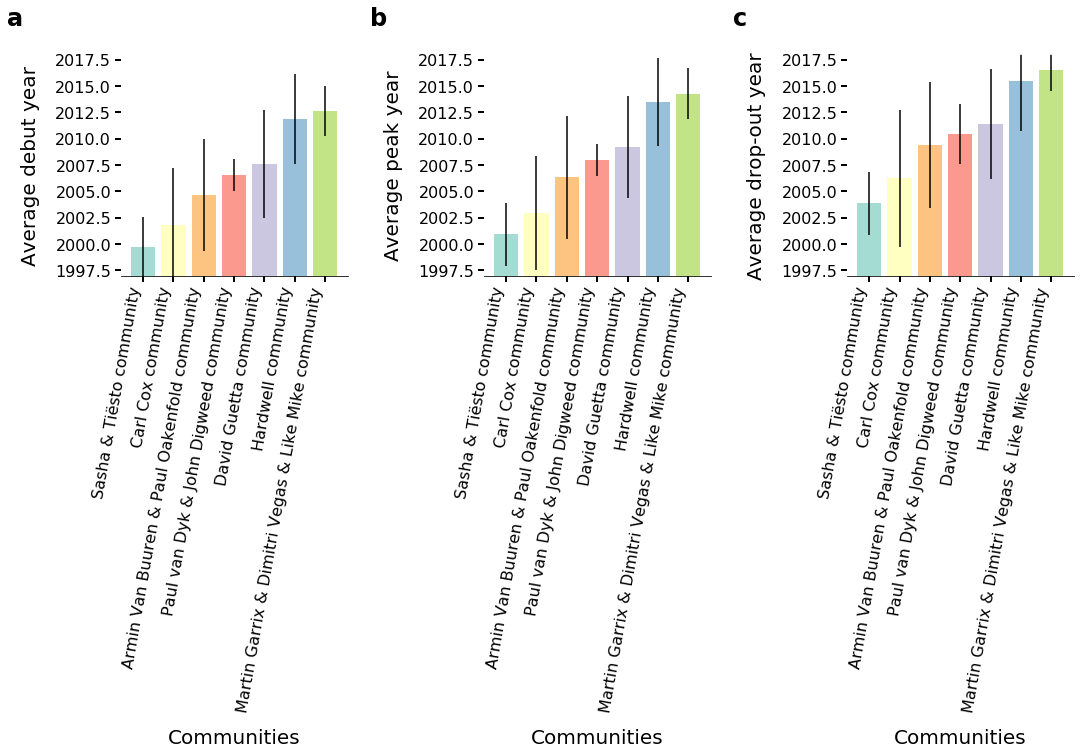

In [2]:
def get_timedistr_hists(ax, field, title):
    
    x, y, yerr = zip(*[(line.strip().split('\t')[0], float(line.strip().split('\t')[1]), float(line.strip().split('\t')[2])) for line in open('DataSI/SFig6/SFigure6_modules_' + field )])
    colors = [colors_comms[c] for c in x]
    
    ax.bar(x,y,yerr=yerr, color = colors, alpha = 0.8)  
    ax.set_xticks(range(len(y)))
    ax.set_xticklabels(x, rotation = 80, ha = 'right')  
    ax.set_ylim([1997,2018])
    ax.set_xlabel('Communities', fontsize = labelfont, labelpad = 15)
    ax.set_ylabel(title, fontsize = labelfont, labelpad = 15)    
    format_axis(ax)

       
f, ax = plt.subplots(1,3,figsize=(15,10))

get_timedistr_hists(ax[0], 'debutyear', 'Average debut year')    
get_timedistr_hists(ax[1], 'peakyear', 'Average peak year')    
get_timedistr_hists(ax[2], 'lastyear', 'Average drop-out year')   

ax[0].annotate('a', xy=(-0.5, 1.1310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1].annotate('b', xy=(-0.5, 1.1310), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[2].annotate('c', xy=(-0.5, 1.1310), xycoords="axes fraction", fontsize = 24,    weight="bold")

plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.6, hspace=None)
plt.savefig('FiguresSI/SFigure8.pdf',bbox_inches="tight") 

# SFigure9

In [20]:
comms_tops = {}
for line in open('DataSI/communities_bests.dat'):
    comm, name, year = line.strip().split('\t')
    if comm not in comms_tops:
        comms_tops[comm] = []
    comms_tops[comm].append((name, int(year)))
    print(year, '\t', name, '\t\t', comm)

1997 	 Sasha 		 Sasha & Tiësto community
2000 	 Tiësto 		 Sasha & Tiësto community
2011 	 Hardwell 		 Hardwell community
1997 	 Carl Cox 		 Carl Cox community
2005 	 David Guetta 		 David Guetta community
1997 	 Paul van Dyk 		 Paul van Dyk & John Digweed community
1997 	 John Digweed 		 Paul van Dyk & John Digweed community
2001 	 Armin Van Buuren 		 Armin Van Buuren & Paul Oakenfold community
1997 	 Paul Oakenfold 		 Armin Van Buuren & Paul Oakenfold community
2011 	 Dimitri Vegas & Like Mike 		 Martin Garrix & Dimitri Vegas & Like Mike community
2013 	 Martin Garrix 		 Martin Garrix & Dimitri Vegas & Like Mike community


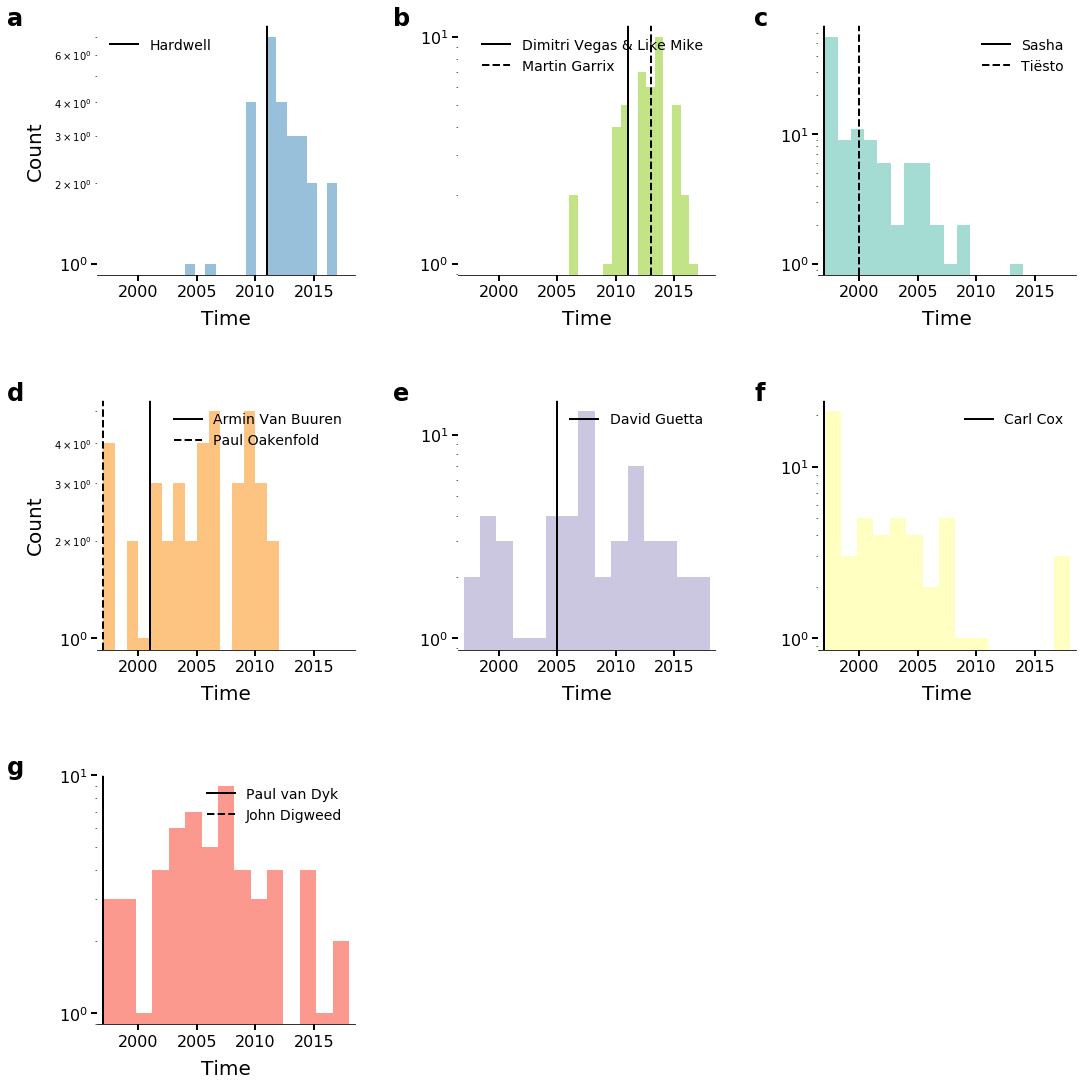

In [25]:
def get_time_distr(ax, comm, color):
     
    x = [float(line.strip()) for line in open('DataSI/SFig7/SFigure7_modules_ages_' + comm  )]
    ax.hist(x, bins = 15, color = color, alpha = 0.8)
    format_axis(ax)
    ax.set_xlabel('Time', fontsize = labelfont, labelpad = 10)
    ax.set_yscale('log')
    ax.set_xlim([1996.5, 2018.5])
    
    for jind, tops in enumerate(comms_tops[comm]):
        if jind == 0: 
            ax.axvline( ls='-',x=tops[1], linewidth = 2, label = tops[0], color = 'k')
        else:
            ax.axvline( ls='--',x=tops[1], linewidth = 2, label = tops[0], color = 'k')
   
    ax.legend(loc = 'best', fontsize = legendfont, frameon = False)

    
f, ax = plt.subplots(3,3,figsize=(15,15))
indicies = [(i,j) for i in range(3) for j in range(3)]

for ind, comm in enumerate(pops.keys()):
    get_time_distr(ax[indicies[ind]], comm, colors_comms[comm])

ax[0,0].set_ylabel('Count', fontsize = labelfont, labelpad = 10)
ax[1,0].set_ylabel('Count', fontsize = labelfont, labelpad = 10)
ax[2,1].axis('off')
ax[2,2].axis('off')

ax[0,0].annotate('a', xy=(-0.35, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,1].annotate('b', xy=(-0.25, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[0,2].annotate('c', xy=(-0.25, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")

ax[1,0].annotate('d', xy=(-0.35, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,1].annotate('e', xy=(-0.25, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")
ax[1,2].annotate('f', xy=(-0.25, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")

ax[2,0].annotate('g', xy=(-0.35, 1.0), xycoords="axes fraction", fontsize = 24,    weight="bold")


plt.tight_layout()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.5)
plt.savefig('FiguresSI/SFigure9.pdf',bbox_inches="tight") 